# Preparación de datos

Hoy trabajaremos SVM. El ds es de celulas de cancer.

## Importar
- Librerías
- Datos


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/cell_samples.csv")

## Exploración de los datos

In [ ]:
df.shape

(699, 11)

In [ ]:
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2



- Clase 2: tumor benigno
- Clase 3: tumor maligno

<Axes: xlabel='Clump', ylabel='UnifSize'>

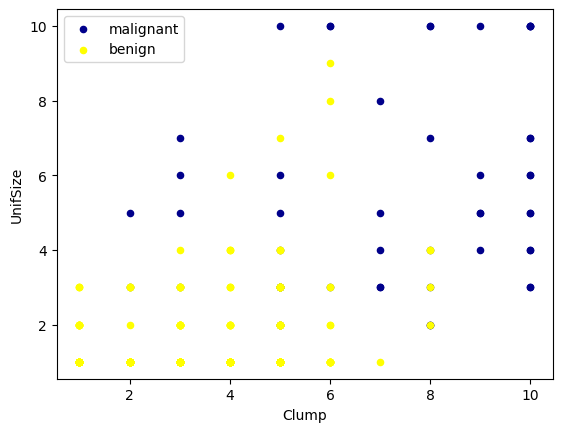

In [ ]:
ax = df[df['Class'] == 4][0:50].plot(kind='scatter',x='Clump',y='UnifSize',color='DarkBlue',label='malignant');
df[df['Class']== 2].plot(kind='scatter',x='Clump',y='UnifSize',color='Yellow',label='benign',ax=ax)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           699 non-null    int64 
 1   Clump        699 non-null    int64 
 2   UnifSize     699 non-null    int64 
 3   UnifShape    699 non-null    int64 
 4   MargAdh      699 non-null    int64 
 5   SingEpiSize  699 non-null    int64 
 6   BareNuc      699 non-null    object
 7   BlandChrom   699 non-null    int64 
 8   NormNucl     699 non-null    int64 
 9   Mit          699 non-null    int64 
 10  Class        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


## Preprocessing

In [ ]:
df = df[pd.to_numeric(df['BareNuc'],errors='coerce').notnull()]
df['BareNuc'] = df['BareNuc'].astype('int')

<ipython-input-8-93c93d11c1e5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BareNuc'] = df['BareNuc'].astype('int')


# Modelado

In [ ]:
X = df[['Clump','UnifSize','UnifShape','MargAdh','SingEpiSize','BareNuc','BlandChrom','NormNucl','Mit']]
y = df['Class']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20,random_state=4)

In [ ]:
from sklearn import svm

Se asume un kernel lineal porque en el deploy voy a querer ver los pesos y si no es lineal no siempre se puede ver.

In [ ]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train,y_train)

SVC(kernel='linear')

# Evaluación

In [ ]:
yhat = clf.predict(X_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [ ]:
accuracy = clf.score(X_test,y_test)
accuracy

0.9635036496350365

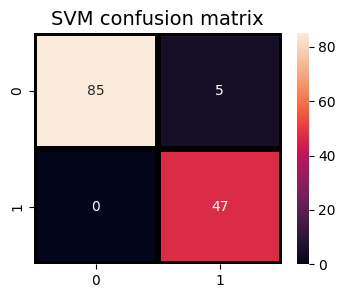

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,yhat),
            annot=True,fmt='d',linecolor='k',linewidths=3)
plt.title("SVM confusion matrix",fontsize=14)
plt.show()

In [ ]:
report = classification_report(y_test,yhat)
print(report)

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137



In [ ]:
from sklearn.metrics import RocCurveDisplay

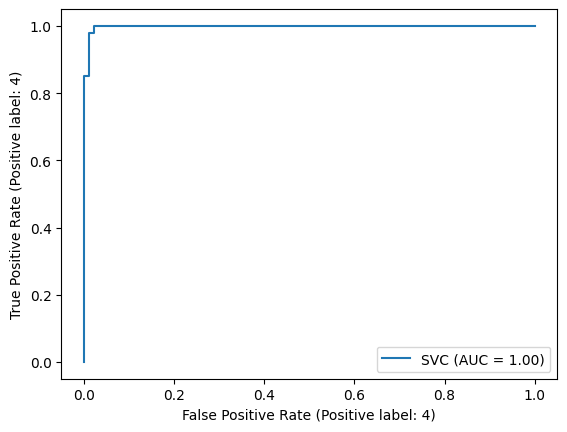

In [ ]:
svc_disp = RocCurveDisplay.from_estimator(clf,X_test,y_test)
plt.show()

# Comunicar resultados

Axes(0.125,0.11;0.775x0.77)


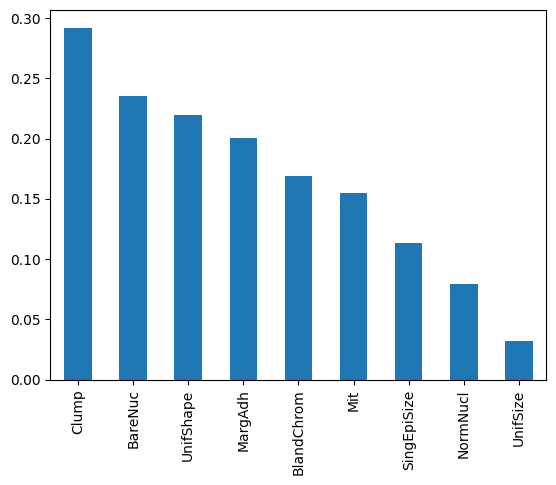

In [ ]:
weights = pd.Series(clf.coef_[0],index=['Clump','UnifSize','UnifShape','MargAdh','SingEpiSize','BareNuc','BlandChrom','NormNucl','Mit'])
print(weights.sort_values(ascending=False)[:10].plot(kind='bar'))

Probar diferentes kernels.
1. Linear
2. Polynomial
3. Radial basis function (RBF)
4. Sigmoid.

ACTUALIZACIÓN: Ya los probé; el mejor es polynomial con acc de 97.08% y el peor sigmoide con 39%. El modelo que deberiamos poner en producción es el poly, pero dejé el lineal porque solo ese me deja mostrar los pesos.